# Data Visualization
### Introduction to Seaborn: statistical data visualization
<table><border=0><tr><td><img src="http://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/errorband_lineplots_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/timeseries_facets_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/regression_marginals_thumb.png" width="100"></td></tr></table>

In today's class. we will learn how to create meaningful visualization that helps summarize the large amount of data effectively. We are introducing two libraries; matplotlib and seaborn.

[Seaborn_API_reference](http://seaborn.pydata.org/api.html)  
It's common to use `sns` as an alias for seaborn.

In [ ]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [ ]:
### Using .head() and .tail() to see data content

In [ ]:
### .info() to provide information on the data

In [ ]:
### What to do with '-' values?
## Change "-" into NAs
euk=pd.read_csv(tsv_Filepath, sep="\t", na_values=["-"])


# How can we **visualize** the relationship between two variables?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [ ]:
## Look at the data for class 'Reptiles' and 'Number of proteins'
euk[["Species","Size (Mb)","Number of genes"]] #not a subset of the df

,Species,Size (Mb),Number of genes
0,Emiliania huxleyi CCMP1516,167.676000,38549.0
1,Arabidopsis thaliana,119.669000,38311.0
2,Glycine max,979.046000,59847.0
3,Medicago truncatula,412.924000,37603.0
4,Solanum lycopersicum,828.349000,31200.0
...,...,...,...
8297,Saccharomyces cerevisiae,3.993920,NaN
8298,Saccharomyces cerevisiae,0.586761,155.0
8299,Saccharomyces cerevisiae,12.020400,NaN
8300,Saccharomyces cerevisiae,11.960900,NaN


Using Seaborn function relplot() we can visualize the relationship between genome size and the number of genes in the entire eukaryote genome dataset. The names of the columns are selected for what we want on the X and Y axes.

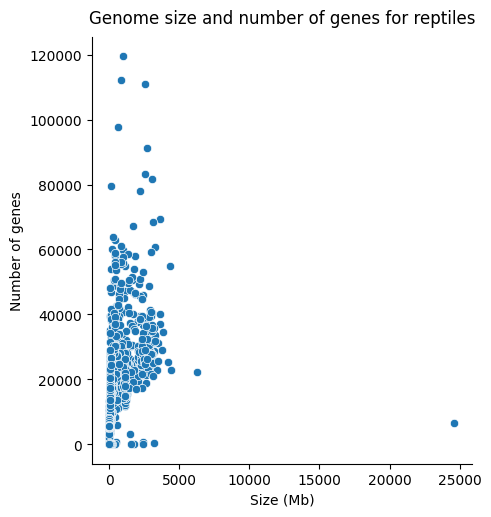

In [ ]:
sns.relplot(data=euk, x="Size (Mb)", y="Number of genes")
plt.title("Genome size and number of genes for reptiles", pad=10); # put a semicolon to omit the stdout text of the plot

### How do we see the data distribution if there is an outlier?
The chart above shows a problem commonly encountered in real life data: there is a single outlier with a massive genome size, which compresses the rest of the data points over to the left and makes it difficult to see the patterns.

We could fix this by manually setting the x axis limits, but it’s probably easier to use pandas to filter the dataframe and exclude very large genomes:

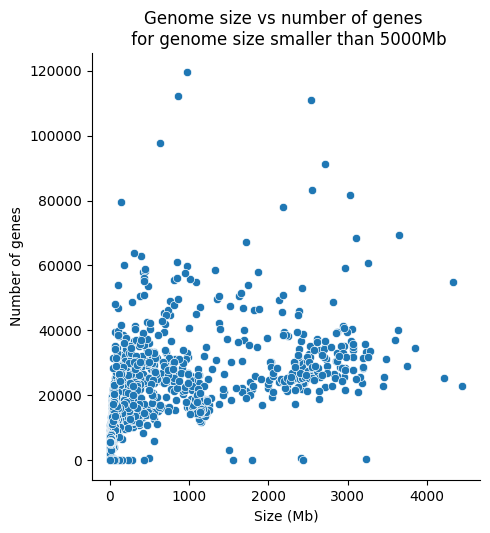

In [ ]:
# Excluding the outlier
sns.relplot(
    data=euk[euk["Size (Mb)"] < 5000],
    x="Size (Mb)",
    y="Number of genes"
)
plt.title("Genome size vs number of genes \n for genome size smaller than 5000Mb");

### Hue
We can map other properties. By setting the hue argument we can specify which column we want to determine the color of each point. Here is another plot of genome size versus number of genes, this time limited to animals and with the GC percentage represented by hue.

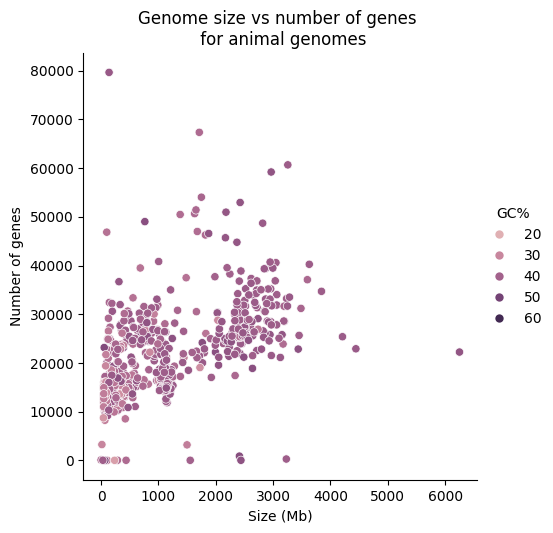

In [ ]:
sns.relplot(
    data=euk[euk["Kingdom"]=="Animals"],
    x="Size (Mb)",
    y="Number of genes",
    hue="GC%"
)
plt.title("Genome size vs number of genes \n for animal genomes");

It’s best to remove any rows with missing data before plotting our data so that it won't impact seaborn's ability to choose the color scales for the `hue`. We wil use panda's `dropna()` to do that.

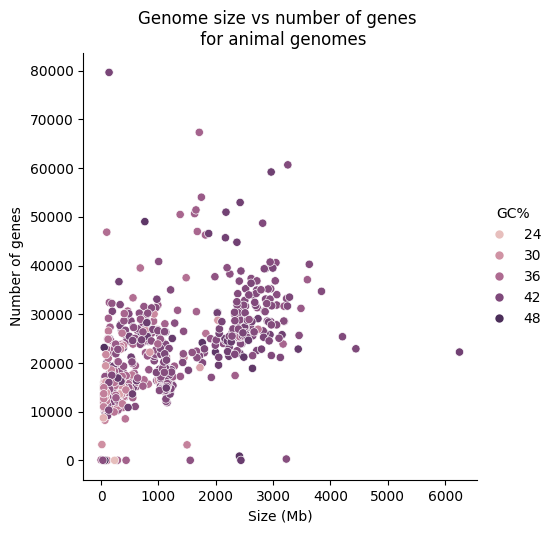

In [ ]:
sns.relplot(
    data=euk[(euk["Kingdom"]=="Animals")].dropna(),
    x="Size (Mb)",
    y="Number of genes",
    hue="GC%"
)
plt.title("Genome size vs number of genes \n for animal genomes");

## Size
If we pick our mapping carefully, we can see multiple relationships between variables in a single plot. Unsurprisingly, larger genomes have more genes. We also noted that larger genomes have a more moderate GC percentages and that the extremes GC% (i.e. very light or dark colors) are over to the left of the chart.

Another property that we can map is the **size** of the data points. Let’s plot number of genes versus number of proteins and have the size of each point determined by the size of the genome. We use size argument to map the size of the dot to the size of the genome. The argument sizes determines the minimum and maximum sizes of the points we want on the plot.

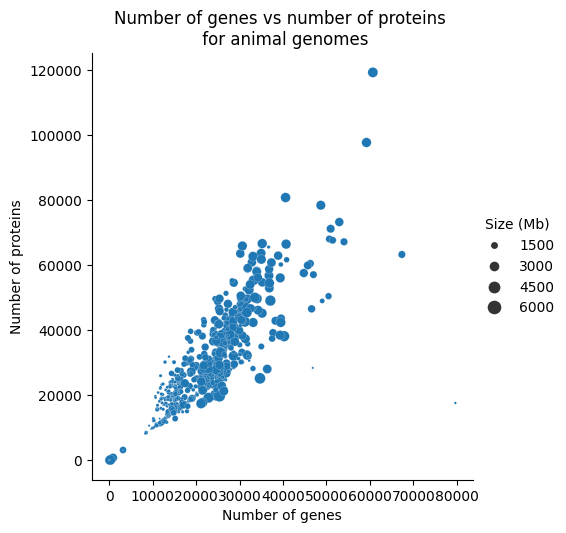

In [ ]:
sns.relplot(
    data=euk[euk["Kingdom"]=="Animals"].dropna(),
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    sizes=(1, 100)
)

plt.title("Number of genes vs number of proteins \n for animal genomes");

Let's map both GC% and genome size. We will use size to keep track of the genome size and hue to keep track of GC percentage.  
You can choose different palette for using different colors by setting the palette argument in relplot. seaborn_color_palettes.

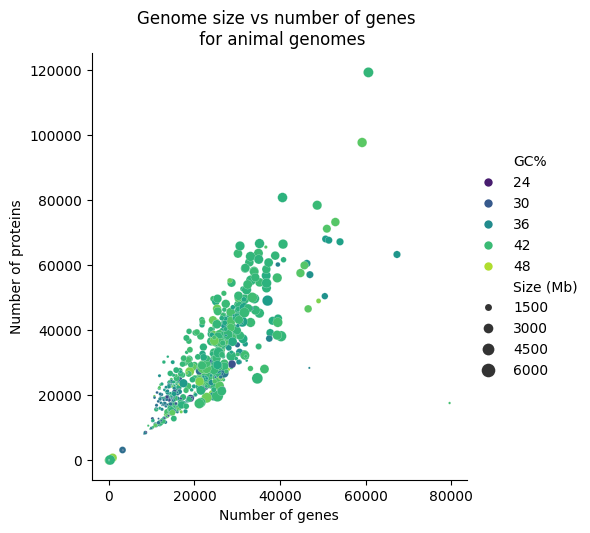

In [ ]:
sns.relplot(
    data=euk[euk["Kingdom"]=="Animals"].dropna(),
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    hue="GC%",
    palette="viridis",
    sizes=(1, 100)
)
plt.title("Genome size vs number of genes \n for animal genomes");

# Categorical plot - `catplot`

In a previous lecture, we counted the number of rows using `value_counts()`. To visualize these counts, we can use seaborn's `catplot`. `catplot` takes in a long-form (tidy) dataframe for plotting. In a tidy dataframe, each column should correspond to a variable, and each row should correspond to an observation.

In [ ]:
euk.head(3)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5000,38549.0,38554.0,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311.0,48265.0,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847.0,71219.0,2010,Chromosome


In [ ]:
### Create a tidy dataframe that contains the Class name of each observation of Animal
# euk[euk["Kingdom"] == "Animals"]["Class"].to_frame() #Using df to subset

animals_df = euk.Class[(euk.Kingdom == "Animals")].to_frame()
animals_df.columns = ['Animals']
# animals_df

There are many kinds of `catplot`. Here we are setting x='Animals' and kind='count' to plot a barplot that represents the counts of each unique obersvation (counts of unique types of Animals).

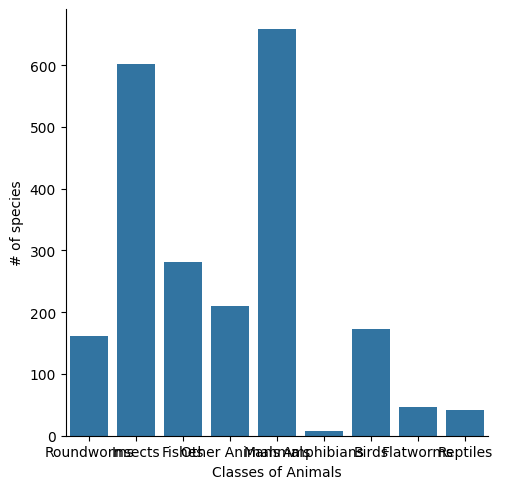

In [ ]:
fig = sns.catplot(
    data=animals_df,
    x='Animals',
    kind='count'
)

fig.set_axis_labels('Classes of Animals', '# of species');

Using set_xticklabels, we can rotate the x-axis label

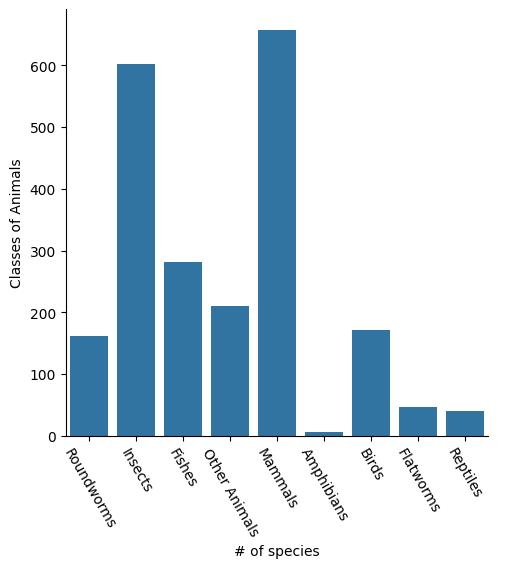

In [ ]:
fig = sns.catplot(
    data=animals_df,
    x='Animals',
    kind='count'
)

fig.set_axis_labels('# of species', 'Classes of Animals');
fig.set_xticklabels(rotation=300);

We can improve the plot by ordering the bars based on the height. We can also swap the x and y axis to avoid having overlapping data along the x-axis.

We will use `value_count` which gives a resulting Series output.This Series is already sorted. Adding .index allows us to get the index of each Class of Animals in the sorted order.

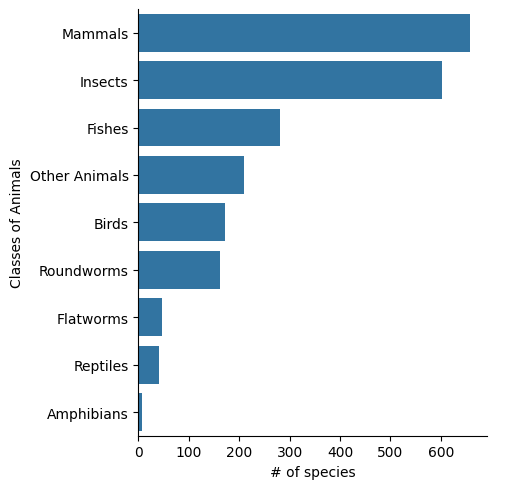

In [ ]:
animals_df['Animals'].value_counts()

fig = sns.catplot(
    data=animals_df,
    y='Animals',
    kind='count',
    order=animals_df['Animals'].value_counts().index
)

fig.set_axis_labels('# of species', 'Classes of Animals');